<a href="https://colab.research.google.com/github/YAP20/WMU102-SKYMIND-MINI-PROJECT-GROUP8/blob/main/The_Detection_of_Email_Spamming_Credit_to_Computer_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**WMU 102 MAKERS@USM-LEVEL 1**

**SKYMIND MINI PROJECT**

**GROUP 8**

**Members with Matric Number:**
1. CHAN SIEW PEI (142132)
2. CHEE KAR YAN (141260)
3. CHIA XIN YI  (142681)
4. YAP SIN YEE  (143547)

**TITLE**

The Detection of Email Spamming

**INTRODUCTION**

The use of electronic messaging systems to send unwanted bulk messages are called spam. Many individuals are unaware that when they download free software, join up for a new service, or even update old software, they are signing up for mailers. They only need to click the "unsubscribe" button to stop receiving emails. However, it takes time to unsubscribe the spam emails one by one, there are also some malicious spammers who will take advantage of this and offer the same format at the bottom of their emails linking the unsubscribe link to malicious downloads and/or tracking cookies. As a result, successful spam email detection and filtration are critical for all email users.

Machine learning (ML) techniques have recently been effectively utilised to detect and filter spam emails. A spam-detector algorithm must figure out how to filter out spam while avoiding flagging authentic items that people wish to receive in their mailbox. To classify data, ML algorithms use statistical models. A trained machine learning model must be able to detect if the sequence of words in an email is more similar to spam emails or not. This means that developers must supply a set of spam and ham message examples to their machine learning model, and then wait for it to identify the relevant patterns that distinguish the two categories. Most email providers have their own vast data sets of labeled emails, and every time they flag an email as spam, it actually provides those developers with training data for its ML algorithms. 

The ML model used by Google have now advanced to the point that it can detect and filter out spam and phishing emails with about 99.9 percent accuracy. According to Google, their Gmail Team use artificial intelligence (AI) to identify and filter spam mails. Gmail Team said that the spam filter now uses an artificial neural network to detect and block the sneaky spam, also, with advances in ML, the AI will take emails users preferences and use them to customize their own spam filter. The industries involved in spam filtering are Microsoft 365, Google and etc. For instances, Microsoft 365 employ ML technologies to sort through a massive amount of information. 

We present some systematic steps of the machine learning based email spam filtering approaches. We use the ML techniques to learn and identify spam mails and phishing messages by analyzing loads of such messages throughout a vast collection of data. There are two types of data present which is ham (non-spam) and spam data in our analysis.


**PROBLEM STATEMENT**

Spamming is one of the major attacks that accumulates numerous of compromised machines by sending unwanted messages, viruses and phishing through emails. We choose this project as nowadays spam and fraud cases are still happening via emails, when an individual clicked the given link, the information may be hacked. The problems people might be facing are: 
-	Unwanted emails irritating Internet users.
-	Spam can crash mail servers and fill up hard drives.
-	Critical messages are missed and delay.
-	Identify theft.

**DATA SET**

The dataset used in this application is the spam_ham dataset. This spam_ham dataset is obtained from the Kaggle website. Mr. Venkatesh Garnepudi is the creator of this dataset, and he has offered a .csv file for anyone interested to download. There are four columns in this dataset such as number, label, text, and label_num. Number denotes the number of emails; label denotes the email labels, which can either be "Spam" or "Ham"; text denotes the content of the email; and label_num denotes two cases: if the email is considered spam, the label is 1; otherwise, it is 0.

In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string

In [ ]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving spam_ham_dataset.csv to spam_ham_dataset.csv


In [ ]:
#Read the CSV file
df = pd.read_csv("spam_ham_dataset.csv")

#Print the first 5 rows of data
df.head(5)

,Number,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


We first obtain the number of rows and columns, name of the columns, remove duplicates and obtain the new number of rows and columns. 

In [ ]:
#Print the shape (Get the number of rows and columns)
df.shape

(5171, 4)

In [ ]:
#Get the columns names
df.columns

Index(['Number', 'label', 'text', 'label_num'], dtype='object')

In [ ]:
#Check for duplicates and remove them
df.drop_duplicates(inplace = True)

In [ ]:
#Show the new shape (new number of rows and columns)
df.shape

(5171, 4)

Note that the number of rows before and after dropping the duplicates are the same, which is 5,171 rows, indicating that there is no duplicate in this data set. 

In [ ]:
#Show the number of missing data (NAN , NaN , na) for each column
df.isnull().sum()

Number       0
label        0
text         0
label_num    0
dtype: int64

There is no missing data in this dataset. Hence,we proceed to obtain the summary statistics of this dataset.

In [ ]:
#Summary statistic for ham and spam in the dataset
df.label.describe()

count     5171
unique       2
top        ham
freq      3672
Name: label, dtype: object

Since this dataset is a nominal dataset, frequency is the only descriptive statistic that can be shown. From the summary statistic above, the emails that are considered as ham entails the highest frequency which is 3,672 letters out of 5,171 letters.

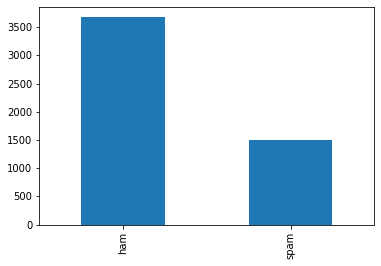

In [ ]:
#Show the number of ham and spam in the dataset using barplot
df.label.value_counts().plot(kind="bar");

By referring to the barplot above, the number of emails considered as ham email entails around 71.01% (3,672/5,171) while the number of emails considered as spam email entails around 28.99% (1,499/5,171).

**PROPOSED APPROACHES**

In [ ]:
#Download the stopwords package
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#To process the text (the mail message)
def process_text(text):

  #1 remove puncutation
  #2 remove stopwords (Stopwords (in Natural Language Processing) means uselss words or data)
  #3 return a list of clean text words

  #1
  nopunc = [char for char in text if char not in string.punctuation]
  nopunc = ''.join(nopunc)
  
  #2
  clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

  #3
  return clean_words

In [ ]:
#Show the tokenization (a list of tokens also called lemmas)
df['text'].head().apply(process_text) 
#Tokenization is to split text into minimal meaningful units

0    [Subject, enron, methanol, meter, 988291, foll...
1    [Subject, hpl, nom, january, 9, 2001, see, att...
2    [Subject, neon, retreat, ho, ho, ho, around, w...
3    [Subject, photoshop, windows, office, cheap, m...
4    [Subject, indian, springs, deal, book, teco, p...
Name: text, dtype: object

To process the text in order to able them to be put into a model and make predictions whether or not the email is spam, we first provide an example to demonstrate and proceed to the real test:

In [ ]:
#Example 

message1 = "hello world hello world play"
message2 = "testing testing one two three hello"
print(message1)
print()

#Convert the text to a matrix of token counts
#bow4 denotes bag of words
from sklearn.feature_extraction.text import CountVectorizer
bow4 = CountVectorizer(analyzer=process_text).fit_transform([[message1],[message2]])
print(bow4)
print()

print(bow4.shape)

hello world hello world play

  (0, 0)	2
  (0, 6)	2
  (0, 2)	1
  (1, 0)	1
  (1, 3)	2
  (1, 1)	1
  (1, 5)	1
  (1, 4)	1

(2, 7)


In [ ]:
#Convert a collection of text to a matriz of tokens
from sklearn.feature_extraction.text import CountVectorizer
messages_bow = CountVectorizer(analyzer=process_text).fit_transform(df['text'])

In [ ]:
#Split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(messages_bow, df['label_num'], test_size=0.20, random_state = 0)


Note that X_train denotes the feature training data set; X_test denotes the feature testing set; y_train denotes the target training set; and y_test denotes the target testing set.

In [ ]:
#Get the shape of messages_bow
messages_bow.shape

(5171, 50381)

In [ ]:
#Create and train the Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(X_train, y_train)


To see how well the model do on training data: 

In [ ]:
#Print the predictions
print(classifier.predict(X_train))

#Print the actual values
print(y_train.values)

[0 0 0 ... 1 0 0]
[0 0 0 ... 1 0 0]


Note that .values is added in printing actual values so that the values will appear in a row instead of displaying all in columns. Next, to evaluate the model: 

In [ ]:
#Evaluate the model on the training data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(X_train)
print(classification_report(y_train, pred))
print()
print('Confusion Matrix: \n', confusion_matrix(y_train, pred))
print()
print('Accuracy: ', accuracy_score(y_train, pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2940
           1       0.98      0.97      0.98      1196

    accuracy                           0.99      4136
   macro avg       0.99      0.98      0.98      4136
weighted avg       0.99      0.99      0.99      4136


Confusion Matrix: 
 [[2918   22]
 [  30 1166]]

Accuracy:  0.9874274661508704


The accuracy for train data is 98.74%. It shows that almost all the messages are correct.

To see how well the model do on test data: 


In [ ]:
#Print the predictions
print(classifier.predict(X_test))

#Print the actual values
print(y_test.values)

[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]


In [ ]:
#Evaluate the model on the training data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(X_test)
print(classification_report(y_test, pred))
print()
print('Confusion Matrix: \n', confusion_matrix(y_test, pred))
print()
print('Accuracy: ', accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       732
           1       0.95      0.96      0.96       303

    accuracy                           0.97      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.97      0.97      0.97      1035


Confusion Matrix: 
 [[718  14]
 [ 13 290]]

Accuracy:  0.9739130434782609


The accuracy for the test data is 97.39%. It shows that the data is working well on the model although it is not as accurate as the training data. 

**CONCLUSION**

In the study, we are able to identify the numerous of emails as spam or non-spam with the accuracy 97.39% by using ML model. Through the used of ML model, we able to filter the spam mails instantly and prevent the critical message being missed or delayed. Apart from that, we able to avoid the irritation from unwanted emails continuing show in the mail box and also reduce the risk of being swindled by the theft.

**REFERENCES** 

Garnepudi. V (2019). Spam Mails Dataset. Retreived from: https://www.kaggle.com/venky73/spam-mails-dataset

Dickson.B (2020). How machine learning removes spam from your inbox. Retrieved from: https://bdtechtalks.com/2020/11/30/machine-learning-spam-detection/

Emmanuel.G.D et al. (2019). Machine learning for email spam filtering: review, approaches and open research problems. Retrieved from: https://doi.org/10.1016/j.heliyon.2019.e01802

**Credits to :** Computer Science. (2019). Email Spam Detection Using Python & Machine Learning. Available at: https://www.youtube.com/watch?v=cNLPt02RwF0 
